In [25]:
import numpy as np
import pandas as pd
from scipy import stats

In [2]:
data = [10,15,20,20,25,30,30,30,40,100]
print("mean:",np.mean(data))
print("median:",np.median(data))
print("mode:",stats.mode(data))

mean: 32.0
median: 27.5
mode: ModeResult(mode=30, count=3)


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: >

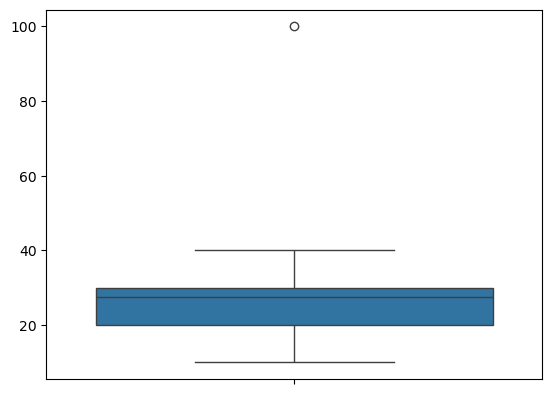

In [4]:
sns.boxplot(data = data)

In [5]:
sales = [120,130,145,150,160,170,170,180,200,250]
range_of_values = np.max(sales) - np.min(sales)
range_of_values

130

In [6]:
print("population mean:", np.mean(sales))
print("population variance:", np.var(sales))
print("standard deviation :", np.std(sales))

population mean: 167.5
population variance: 1256.25
standard deviation : 35.443617196894564


In [7]:
np.mean(sales) + 2 * np.std(sales) 

238.38723439378913

In [8]:
np.mean(sales) -  2 * np.std(sales) 

96.61276560621087

<Axes: >

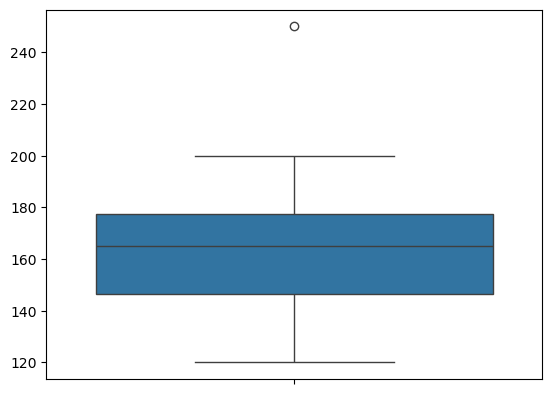

In [9]:
sns.boxplot(sales)

<Axes: ylabel='Count'>

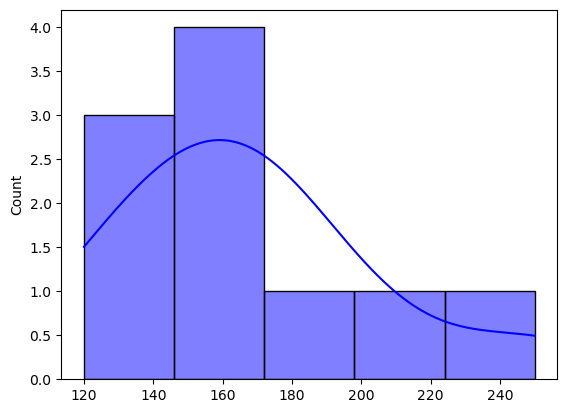

In [10]:
sns.histplot(sales,color = "blue",kde = True)

In [11]:
data1 = {
    "Month": pd.date_range(start="2023-01-01", periods=12, freq='ME'),
    "Sales": [200,220,250,230,260,280,300,310,290,320,330,340]
}
df1 = pd.DataFrame(data1)
df1

,Month,Sales
0,2023-01-31,200
1,2023-02-28,220
2,2023-03-31,250
3,2023-04-30,230
4,2023-05-31,260
5,2023-06-30,280
6,2023-07-31,300
7,2023-08-31,310
8,2023-09-30,290
9,2023-10-31,320


<Axes: xlabel='Sales', ylabel='Count'>

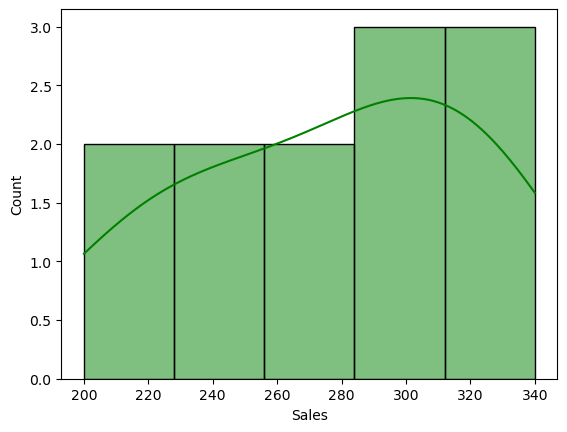

In [12]:
sns.histplot(data = df1['Sales'],kde= True, color = "green")

<Axes: ylabel='Sales'>

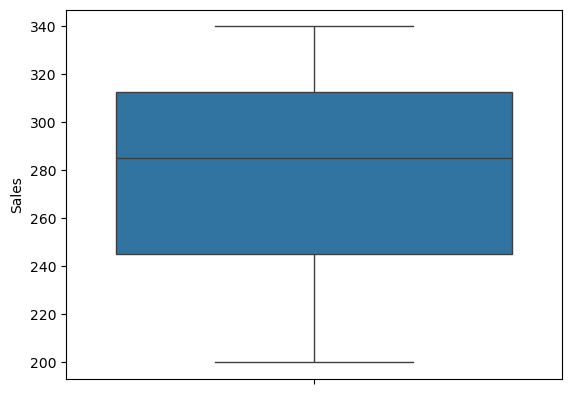

In [13]:
sns.boxplot(data = df1['Sales'])

In [15]:
from sklearn.linear_model import LinearRegression


In [21]:
x = np.array(df1.index).reshape(-1, 1)  # Reshape for sklearn
y = df1['Sales']
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [22]:
next_quarter_index = np.array([12,13,14]).reshape(-1, 1)  # Next three quarters
predicted_sales = model.predict(next_quarter_index)

In [ ]:
predicted_sales

array([356.81818182, 369.02097902, 381.22377622])

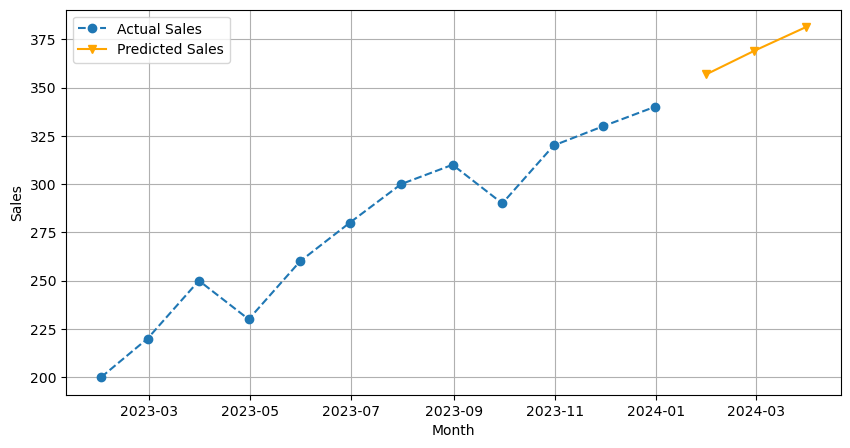

In [37]:
plt.figure(figsize=(10, 5))
plt.plot(df1["Month"], df1["Sales"], marker='o',linestyle = '--', label='Actual Sales')
next_quarter_index = pd.date_range(start = df1["Month"].iloc[-1]+ pd.DateOffset(months=1), periods=3, freq='ME')
plt.plot(next_quarter_index, predicted_sales, marker='v', color='orange', label='Predicted Sales')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.grid()
plt.legend()
plt.show()